In [114]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns 

In [139]:
# Läs in rådata
df = pd.read_csv('resenorden_data.csv')
print("Datauppsättningens storlek:", df.shape)

Datauppsättningens storlek: (1915, 18)


In [143]:
df.head(10)

,bokning_id,bokningsdatum,kund_id,destination,land,avresedatum,hemresedatum,antal_resenärer,pakettyp,pris,valuta,hotell,bokningskanal,status,avbokningsdatum,recension_text,recensionsdatum,betyg
0,RES-2024-00001,2024-01-08,KUND-05456,Köpenhamn,Danmark,2024-01-13,2024-01-15,2,Weekend-paket,8046.10,SEK,Comfort Hotel Vesterbro,App,Genomförd,NaN,"Inget speciellt att rapportera, det fungerade.",2024-01-30,3.0
1,RES-2024-00002,2024-01-26,KUND-05456,Rovaniemi,Finland,2024-03-06,2024-03-11,2,All inclusive,34924.80,SEK,Scandic Rovaniemi,Telefon,Klar,NaN,All inclusive var värt pengarna. Inga bekymmer.,2024-04-01,4.0
2,RES-2024-00003,2024-01-13,KUND-05177,Rovaniemi,Finland,2024-02-09,2024-02-14,2,Halvpension,26757.60,SEK,Scandic Rovaniemi,App,Genomförd,NaN,Smidigt att boka och allt fungerade perfekt.,2024-02-19,4.0
3,RES-2024-00004,2024-01-12,KUND-06857,Tromsø,Norge,2024-02-17,2024-02-20,2,Halvpension,2349.80,EUR,Clarion Hotel The Edge,Webb,Genomförd,NaN,Såg norrsken tre av fyra kvällar. Fantastiskt!,2024-03-03,5.0
4,RES-2024-00005,2024-01-13,KUND-08178,Köpenhamn,Danmark,2024-01-18,2024-01-20,2,Weekend-paket,5289.74,DKK,Comfort Hotel Vesterbro,App,Genomförd,NaN,NaN,NaN,NaN
5,RES-2024-00006,2024-01-18,KUND-05585,Oslo,Norge,2024-03-10,2024-03-14,2,ALL INCLUSIVE,34038.00,NOK,Comfort Hotel Grand Central,Telefon,Genomförd,NaN,NaN,NaN,NaN
6,RES-2024-00007,2024-01-14,KUND-08527,Köpenhamn,Danmark,2024-02-10,2024-02-13,2,Endast boende,1165.02,EUR,Hotel D'Angleterre,Webb,Genomförd,NaN,NaN,NaN,NaN
7,RES-2024-00008,2024-01-09,KUND-05469,HELSINGFORS,Finland,2024-02-27,2024-03-03,2,Halvpension,15127.20,SEK,Original Sokos Hotel,Webb,Genomförd,NaN,NaN,NaN,NaN
8,RES-2024-00009,2024-01-10,KUND-08120,Köpenhamn,Danmark,2024-01-27,2024-01-29,2,Weekend-paket,9559.10,SEK,Hotel D'Angleterre,Webb,Genomförd,NaN,"Mysig stad, trevliga restauranger, fin stämning.",2024-02-09,4.0
9,RES-2024-00010,2024-01-03,KUND-08178,Reykjavik,Island,2024-02-14,2024-02-17,3,Weekend-paket,23583.00,SEK,Hotel Borg,Telefon,Genomförd,NaN,NaN,NaN,NaN


In [51]:
# Initial utforskning (EDA)
print("DATAÖVERSIKT")
print(f"Antal rader: {df.shape[0]}")
print(f"Antal kolumner: {df.shape[1]}")

DATAÖVERSIKT
Antal rader: 1915
Antal kolumner: 18


In [52]:
print("\nKOLUMNTYPER OCH SAKNADE VÄRDEN ")
df.info()


KOLUMNTYPER OCH SAKNADE VÄRDEN 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bokning_id       1915 non-null   object 
 1   bokningsdatum    1915 non-null   object 
 2   kund_id          1915 non-null   object 
 3   destination      1915 non-null   object 
 4   land             1786 non-null   object 
 5   avresedatum      1915 non-null   object 
 6   hemresedatum     1915 non-null   object 
 7   antal_resenärer  1915 non-null   int64  
 8   pakettyp         1915 non-null   object 
 9   pris             1915 non-null   float64
 10  valuta           1878 non-null   object 
 11  hotell           1840 non-null   object 
 12  bokningskanal    1802 non-null   object 
 13  status           1915 non-null   object 
 14  avbokningsdatum  155 non-null    object 
 15  recension_text   681 non-null    object 
 16  recensionsdatum  681 non-nu

In [53]:
print("SAKNADE VÄRDEN PER KOLUMN")
df.isnull().sum()

SAKNADE VÄRDEN PER KOLUMN


bokning_id            0
bokningsdatum         0
kund_id               0
destination           0
land                129
avresedatum           0
hemresedatum          0
antal_resenärer       0
pakettyp              0
pris                  0
valuta               37
hotell               75
bokningskanal       113
status                0
avbokningsdatum    1760
recension_text     1234
recensionsdatum    1234
betyg              1234
dtype: int64

In [54]:
print(" UNIKA VÄRDEN I VÄLDA KATEGORIKOLUMNER ")
for col in ['destination', 'status', 'pakettyp', 'bokningskanal', 'valuta',]: 
    print(f"\n{col}:")
    print(df[col].value_counts().head(10))

 UNIKA VÄRDEN I VÄLDA KATEGORIKOLUMNER 

destination:
destination
Köpenhamn      592
Oslo           232
Tromsø         163
Reykjavik      163
Helsingfors    136
Rovaniemi      128
Bergen          95
Trondheim       75
Kopenhamn       29
København       24
Name: count, dtype: int64

status:
status
Genomförd    1456
Avbokad       147
Bekräftad     128
Klar           46
GENOMFÖRD      39
Completed      36
genomförd      27
Confirmed       7
OK              6
bekräftad       5
Name: count, dtype: int64

pakettyp:
pakettyp
Weekend-paket    544
Halvpension      425
All inclusive    367
Endast boende    343
WEEKEND-PAKET     21
Helgresa          20
halvpension       16
weekend-paket     16
HP                16
Room Only         15
Name: count, dtype: int64

bokningskanal:
bokningskanal
Webb       864
App        531
Telefon    287
WEBB        17
web         16
Website     12
Online      12
app         11
Mobile      10
APP          9
Name: count, dtype: int64

valuta:
valuta
SEK    1461
EUR   

Anledning: Jag vill se datans grundläggande struktur – vilka kolumner som finns, hur många saknade värden det finns, och unika värden i viktiga kategorikolumner. Detta hjälper mig att identifiera datakvalitetsproblem.

# Problemanalys från EDA
1. Datumkolumner (bokningsdatum, avresedatum, hemresedatum):
   - Olika datumformat (2024-12-14, 2024/12/14, 14 december 2024)
   - Olika separatorer och datumordningar

2. Destination:
   - Samma stad med olika stavningar (Köpenhamn, København, Copenhagen, CPH)
   - Versaler/gemener inkonsekventa

3. Status:
   - Språkblandning (Genomförd, Completed, Confirmed)
   - Olika ord för samma sak (Avbokad, Cancelled, Struken)

4. Pakettyp:
   - Många synonymer (Weekend-paket, WEEKEND-PAKET, Helgresa)
   - Förkortningar (AI, HP, RO)

5. Bokningskanal:
   - Inkonsekventa namn (Webb, web, Website, Online)

6. Saknade värden:
   - land: 129 saknade värden
   - valuta: 37 saknade värden
   - hotell: 75 saknade värden

# Transform – Datatvätt


In [136]:
# Kopiera originaldata för transformation
df_clean = df.copy()
print(f"Originalstorlek: {df_clean.shape}")

Originalstorlek: (1915, 18)


Anledning: Jag skapar en kopia av originaldata för att behålla rådata oröd.

In [137]:
# 2.1 RENSA DATUMKOLUMNER

# Funktion för att standardisera datum (men appliceras direkt)
def clean_date_column(date):
    # Konvertera till sträng, gemener, ta bort mellanslag
    date = date.astype(str).str.lower().str.strip()
    
    # Svenska månader till siffror
    months_map = {
        "januari": "1", "februari": "2", "mars": "3", "april": "4",
        "maj": "5", "juni": "6", "juli": "7", "augusti": "8",
        "september": "9", "oktober": "10", "november": "11", "december": "12"
    }
    
    # Ersätt månadsnamn
    for month_swe, month_num in months_map.items():
        date = date.str.replace(month_swe, month_num, regex=False)
    
    # Konvertera till datetime
    return pd.to_datetime(date, format="mixed", dayfirst=True, errors="coerce")

# Applicera på alla datumkolumner
for col in ['bokningsdatum', 'avresedatum', 'hemresedatum']:
    new_col = f"{col}_clean"
    df_clean[new_col] = clean_date_column(df_clean[col])
    print(f"{col} -> {new_col}: {df_clean[new_col].isnull().sum()} ogiltiga datum")

print("Datum rensade")

bokningsdatum -> bokningsdatum_clean: 0 ogiltiga datum
avresedatum -> avresedatum_clean: 0 ogiltiga datum
hemresedatum -> hemresedatum_clean: 0 ogiltiga datum
Datum rensade


Anledning: Jag skapar en funktion för datumrensning men applicerar den direkt. Detta standardiserar alla datum till samma format, vilket är nödvändigt för korrekt analys.



In [128]:
# 2.2 RENSA DESTINATION

# Normalisera till gemener först
df_clean['destination_clean'] = df_clean['destination'].str.lower().str.strip()

# Mappning för att slå ihop olika stavningar
destination_map = {
    'kopenhamn': 'köpenhamn',
    'københavn': 'köpenhamn',
    'cph': 'köpenhamn',
    'copenhagen': 'köpenhamn',
    'köpnhamn': 'köpenhamn',
    'köpenhman': 'köpenhamn',
    'köpenhamnn': 'köpenhamn',
    'oslö': 'oslo',
    'rey': 'reykjavik',
    'reykavik': 'reykjavik',
    'reykajvik': 'reykjavik',
    'reykjavk': 'reykjavik',
    'reikjavik': 'reykjavik',
    'tromsö': 'tromsø',
    'tromso': 'tromsø',
    'tromsøø': 'tromsø',
    'hfors': 'helsingfors',
    'helsingfross': 'helsingfors',
    'helsingfor': 'helsingfors',
    'rovaniem': 'rovaniemi',
    'tronheim': 'trondheim'
}

# Applicera mappningen
df_clean['destination_clean'] = df_clean['destination_clean'].replace(destination_map)

print("Unika destinationer efter rensning:")
print(df_clean['destination_clean'].value_counts())
print(f"\nAntal unika destinationer före: {df['destination'].nunique()}")
print(f"Antal unika destinationer efter: {df_clean['destination_clean'].nunique()}")



Unika destinationer efter rensning:
destination_clean
köpenhamn      726
oslo           265
tromsø         203
reykjavik      189
helsingfors    159
rovaniemi      156
bergen         108
trondheim       96
helsinki        10
reykjavík        3
Name: count, dtype: int64

Antal unika destinationer före: 39
Antal unika destinationer efter: 10


Anledning: Destination har många stavningsvarianter. Genom att mappa dem till standardnamn minskar vi antalet kategorier.

In [129]:
# FYLL I SAKNADE LAND BASERAT PÅ DESTINATION

# Först, normalisera befintliga land-värden
df_clean['land'] = df_clean['land'].astype(str).str.strip().str.capitalize()

# Mappning från destination till land
destination_to_land = {
    'köpenhamn': 'Danmark',
    'oslo': 'Norge',
    'reykjavik': 'Island',
    'tromsø': 'Norge',
    'helsingfors': 'Finland',
    'rovaniemi': 'Finland',
    'trondheim': 'Norge',
    'bergen': 'Norge',
    'helsinki': 'Finland'
}

# Fyll i saknade värden
missing_land_mask = (df_clean['land'].isnull()) | (df_clean['land'] == 'Nan')
df_clean.loc[missing_land_mask, 'land'] = df_clean.loc[missing_land_mask, 'destination_clean'].map(
    lambda x: destination_to_land.get(x, 'Okänt')
)

print(f"\nSaknade land före: {df['land'].isnull().sum()}")
print(f"Saknade land efter: {df_clean['land'].isnull().sum()}")


Saknade land före: 129
Saknade land efter: 0


Anledning: Många rader saknar land, men vi kan koppla landet från destinationen.



In [130]:
# RENSA STATUS

# Normalisera först
df_clean['status_clean'] = df_clean['status'].str.lower().str.strip()

# Mappning till två huvudkategorier
status_map = {
    'genomförd': 'bekräftad',
    'klar': 'bekräftad',
    'completed': 'bekräftad',
    'confirmed': 'bekräftad',
    'ok': 'bekräftad',
    'bokad': 'bekräftad',
    'bokat': 'bekräftad',
    'conf': 'bekräftad',
    'färdig': 'bekräftad',
    'done': 'bekräftad',
    'struken': 'avbokad',
    'avbokad': 'avbokad',
    'avbeställd': 'avbokad',
    'cancelled': 'avbokad',
    'canceled': 'avbokad'
}

# Applicera mappning
df_clean['status_clean'] = df_clean['status_clean'].replace(status_map)

print("\nStatus före rensning:")
print(df['status'].value_counts().head())
print("\nStatus efter rensning:")
print(df_clean['status_clean'].value_counts())


Status före rensning:
status
Genomförd    1456
Avbokad       147
Bekräftad     128
Klar           46
GENOMFÖRD      39
Name: count, dtype: int64

Status efter rensning:
status_clean
bekräftad    1757
avbokad       158
Name: count, dtype: int64


Anledning: Status har många varianter som egentligen betyder samma sak. Så vi reducera de  till två huvudkategorier ("bekräftad" och "avbokad").

In [131]:
# RENSA PAKETTYP

df_clean['pakettyp_clean'] = df_clean['pakettyp'].str.lower().str.strip()

pakettyp_map = {
    'weekend-paket': 'weekend-paket',
    'weekend paket': 'weekend-paket',
    'weekend': 'weekend-paket',
    'helgresa': 'weekend-paket',
    'helgpaket': 'weekend-paket',
    'kortresa': 'weekend-paket',
    'halvpension': 'halvpension',
    'hp': 'halvpension',
    'half board': 'halvpension',
    'all-inclusive': 'all-inclusive',
    'all inclusive': 'all-inclusive',
    'all inkl': 'all-inclusive',
    'ai': 'all-inclusive',
    'allt ingår': 'all-inclusive',
    'full board': 'all-inclusive',
    'fb': 'all-inclusive',
    'endast-boende': 'endast-boende',
    'endast boende': 'endast-boende',
    'bara hotell': 'endast-boende',
    'room only': 'endast-boende',
    'ro': 'endast-boende',
    'b&b': 'endast-boende',
    'bed & breakfast': 'endast-boende'
}

df_clean['pakettyp_clean'] = df_clean['pakettyp_clean'].replace(pakettyp_map)

print("\nPakettyp före rensning:")
print(df['pakettyp'].value_counts().head(10))
print("\nPakettyp efter rensning:")
print(df_clean['pakettyp_clean'].value_counts())


Pakettyp före rensning:
pakettyp
Weekend-paket    544
Halvpension      425
All inclusive    367
Endast boende    343
WEEKEND-PAKET     21
Helgresa          20
halvpension       16
weekend-paket     16
HP                16
Room Only         15
Name: count, dtype: int64

Pakettyp efter rensning:
pakettyp_clean
weekend-paket    624
halvpension      481
all-inclusive    409
endast-boende    401
Name: count, dtype: int64


Anledning: Liksom med status har pakettyp många synonymer. Så vi standardisera de  till 4 huvudkategorier.

In [132]:
# RENSA BOKNINGSKANAL

df_clean['bokningskanal_clean'] = df_clean['bokningskanal'].str.lower().str.strip()

bokningskanal_map = {
    'webb': 'website',
    'web': 'website',
    'website': 'website',
    'online': 'website',
    'internet': 'website',
    'app': 'app',
    'telefon': 'telefon',
    'phone': 'telefon',
    'tel': 'telefon',
    'mobil': 'telefon',
    'mobile': 'telefon',
    'ring': 'telefon'
}

df_clean['bokningskanal_clean'] = df_clean['bokningskanal_clean'].replace(bokningskanal_map)

print("\nBokningskanal före rensning:")
print(df['bokningskanal'].value_counts().head(10))
print("\nBokningskanal efter rensning:")
print(df_clean['bokningskanal_clean'].value_counts())


Bokningskanal före rensning:
bokningskanal
Webb       864
App        531
Telefon    287
WEBB        17
web         16
Website     12
Online      12
app         11
Mobile      10
APP          9
Name: count, dtype: int64

Bokningskanal efter rensning:
bokningskanal_clean
website    928
app        551
telefon    323
Name: count, dtype: int64


Anledning: Bokningskanal har också många varianter. Så vi standardisera de till tre kanaler (website, app, telefon).

In [133]:
# VALUTAKONVERTERING TILL SEK

# Normalisera valuta först
df_clean['valuta_clean'] = df_clean['valuta'].str.lower().str.strip()

# Valutakurser
valuta_map = {
    'sek': 1.0,
    'eur': 11.3,
    'nok': 0.95,
    'dkk': 1.52
}

# Konvertera till SEK
df_clean['pris_sek'] = df_clean.apply(
    lambda row: row['pris'] * valuta_map.get(row['valuta_clean'], 1.0),
    axis=1
)

# Fyll i saknade valutor med "okänt"
df_clean['valuta'] = df_clean['valuta'].fillna('okänt')

print(f"\nValutor före rensning: {df['valuta'].unique()}")
print(f"Valutor efter rensning: {df_clean['valuta_clean'].unique()}")
print(f"\nPris i SEK skapat. Exempelvärden:")
print(df_clean[['pris', 'valuta_clean', 'pris_sek']].head())


Valutor före rensning: ['SEK' 'EUR' 'DKK' 'NOK' nan]
Valutor efter rensning: ['sek' 'eur' 'dkk' 'nok' nan]

Pris i SEK skapat. Exempelvärden:
       pris valuta_clean    pris_sek
0   8046.10          sek   8046.1000
1  34924.80          sek  34924.8000
2  26757.60          sek  26757.6000
3   2349.80          eur  26552.7400
4   5289.74          dkk   8040.4048


Anledning: Priser i olika valutor gör det svårt att jämföra. Genom att konvertera alla till SEK skapar vi en enhetlig valuta för analys.

In [63]:
# FILL I SAKNADE VÄRDEN I ÖVRIGA KOLUMNER

# Hotell: sätt till "okänt" för saknade värden
df_clean['hotell'] = df_clean['hotell'].fillna('okänt')

# Recensioner: sätt tom sträng för saknade
df_clean['recension_text'] = df_clean['recension_text'].fillna('')

print("\nSLUTSTATUS FÖR SAKNADE VÄRDEN")
print(df_clean.isnull().sum())
print(f"\nTotalt antal rader efter rensning: {len(df_clean)}")
print(f"Antal rader med helt kompletta data: {len(df_clean.dropna())}")


SLUTSTATUS FÖR SAKNADE VÄRDEN
bokning_id                0
bokningsdatum             0
kund_id                   0
destination               0
land                      0
avresedatum               0
hemresedatum              0
antal_resenärer           0
pakettyp                  0
pris                      0
valuta                    0
hotell                    0
bokningskanal           113
status                    0
avbokningsdatum        1760
recension_text            0
recensionsdatum        1234
betyg                  1234
bokningsdatum_clean       0
avresedatum_clean         0
hemresedatum_clean        0
destination_clean         0
status_clean              0
pakettyp_clean            0
bokningskanal_clean     113
valuta_clean             37
pris_sek                  0
dtype: int64

Totalt antal rader efter rensning: 1915
Antal rader med helt kompletta data: 1


Anledning: Jag fyller i de sista saknade värdena med lämpliga standardvärden för att undvika problem i analysen.

# data dictionary

1. bokningsdatum_clean , avresedatum_clean, hemresedatum_clean:
   - beskrivning: Rensat bokningsdatum i datetime-format
   - datatyp: datetime64[ns]
   - status: ny kolumn
   - kommentar: Jag skapar en funktion för datumrensning men applicerar den direkt. Detta standardiserar alla datum till samma format, vilket är nödvändigt för korrekt analys.

2. destination_clean:
   - beskrivning: Standardiserad destination
   - datatyp: object
   - status: ny kolumn
   - kommentar: Destination har många stavningsvarianter. Genom att mappa dem till standardnamn minskar vi antalet kategorier.

3. land: 
   - beskriving: kopplat land utifrån destination 
   - datatyp: object
   - status: ny kolumn 
   - kommentar: Många rader saknar land, men vi kan koppla landet från destinationen.

4. status_clean: 
   - beskriving: Standardiserad status 
   - datatyp: object 
   - status: ny kolumn 
   - komentar: Status har många varianter som egentligen betyder samma sak. Så vi reducera de  till två huvudkategorier ("bekräftad" och "avbokad").

5. pakettyp_clean:
   - beskrivning: Standardiserad paketyp 
   - datatyp: object 
   - status: ny kolumn 
   - komentar: Liksom med status har pakettyp många synonymer. Så vi standardisera de  till 4 huvudkategorier.

6. bokningskanal_clean: 
   - beskriving: Standardiserad bokningskanal
   - datatyp: object 
   - status: ny kolumn 
   - komentar: Bokningskanal har också många varianter. Så vi standardisera de till tre kanaler (website, app, telefon).

7. valuta_clean:
   - beskrivng: valutakonverterung till sek 
   - datatyp: float
   - status: ny kolumn 
   - beskriving: Fyll i saknade valutor med "okänt". Priser i olika valutor gör det svårt att jämföra. Genom att konvertera alla till SEK skapar vi en enhetlig valuta för analys.

8. övrigt: 
   - fill i saknade värden i övriga kolumner 
   - Hotell: sätt till "okänt" för saknade värden
   - Recensioner: sätt tom sträng för saknade
   - Jag fyller i de sista saknade värdena med lämpliga standardvärden för att undvika problem i analysen.

## Feature Engineering
Nya kolumner skapas för att möjliggöra analys. 

In [64]:
# Först: Konvertera alla datumkolumner till datetime
date_columns = ['bokningsdatum_clean', 'avresedatum_clean', 'hemresedatum_clean']

for col in date_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
        print(f"{col}: {df_clean[col].isnull().sum()} ogiltiga datum efter konvertering")

bokningsdatum_clean: 0 ogiltiga datum efter konvertering
avresedatum_clean: 0 ogiltiga datum efter konvertering
hemresedatum_clean: 0 ogiltiga datum efter konvertering


In [65]:
# BERÄKNA LEDTIDER OCH RESLÄNGD

df_clean['ledtid_dagar'] = (df_clean['avresedatum_clean'] - df_clean['bokningsdatum_clean']).dt.days
df_clean['reslängd_dagar'] = (df_clean['hemresedatum_clean'] - df_clean['avresedatum_clean']).dt.days
df_clean['vecka_bokning'] = df_clean['bokningsdatum_clean'].dt.isocalendar().week
df_clean['manad_bokning'] = df_clean['bokningsdatum_clean'].dt.month

Anledning:
- Ledtid visar hur långt i förväg folk bokar

- Reslängd hjälper oss förstå typiska resor

- Datumfeatures möjliggör analys av säsongsmönster

In [118]:
# Visa första 10 raderna med alla kolumner
df_clean.head(10)

,bokning_id,bokningsdatum,kund_id,destination,land,avresedatum,hemresedatum,antal_resenärer,pakettyp,pris,...,pakettyp_clean,bokningskanal_clean,valuta_clean,pris_sek,ledtid_dagar,reslängd_dagar,vecka_bokning,manad_bokning,ledtid_kategori,reslängd_kategori
0,RES-2024-00001,2024-01-08,KUND-05456,Köpenhamn,Danmark,2024-01-13,2024-01-15,2,Weekend-paket,8046.10,...,weekend-paket,app,sek,8046.1000,5,2,2,1,Sista minuten (≤1 vecka),Kortresa (≤3 dagar)
1,RES-2024-00002,2024-01-26,KUND-05456,Rovaniemi,Finland,2024-03-06,2024-03-11,2,All inclusive,34924.80,...,all-inclusive,telefon,sek,34924.8000,40,5,4,1,Mellanlång (1-3 månader),Veckoresa (4-7 dagar)
2,RES-2024-00003,2024-01-13,KUND-05177,Rovaniemi,Finland,2024-02-09,2024-02-14,2,Halvpension,26757.60,...,halvpension,app,sek,26757.6000,27,5,2,1,Kort (1-4 veckor),Veckoresa (4-7 dagar)
3,RES-2024-00004,2024-01-12,KUND-06857,Tromsø,Norge,2024-02-17,2024-02-20,2,Halvpension,2349.80,...,halvpension,website,eur,26552.7400,36,3,2,1,Mellanlång (1-3 månader),Kortresa (≤3 dagar)
4,RES-2024-00005,2024-01-13,KUND-08178,Köpenhamn,Danmark,2024-01-18,2024-01-20,2,Weekend-paket,5289.74,...,weekend-paket,app,dkk,8040.4048,5,2,2,1,Sista minuten (≤1 vecka),Kortresa (≤3 dagar)
5,RES-2024-00006,2024-01-18,KUND-05585,Oslo,Norge,2024-03-10,2024-03-14,2,ALL INCLUSIVE,34038.00,...,all-inclusive,telefon,nok,32336.1000,52,4,3,1,Mellanlång (1-3 månader),Veckoresa (4-7 dagar)
6,RES-2024-00007,2024-01-14,KUND-08527,Köpenhamn,Danmark,2024-02-10,2024-02-13,2,Endast boende,1165.02,...,endast-boende,website,eur,13164.7260,27,3,2,1,Kort (1-4 veckor),Kortresa (≤3 dagar)
7,RES-2024-00008,2024-01-09,KUND-05469,HELSINGFORS,Finland,2024-02-27,2024-03-03,2,Halvpension,15127.20,...,halvpension,website,sek,15127.2000,49,5,2,1,Mellanlång (1-3 månader),Veckoresa (4-7 dagar)
8,RES-2024-00009,2024-01-10,KUND-08120,Köpenhamn,Danmark,2024-01-27,2024-01-29,2,Weekend-paket,9559.10,...,weekend-paket,website,sek,9559.1000,17,2,2,1,Kort (1-4 veckor),Kortresa (≤3 dagar)
9,RES-2024-00010,2024-01-03,KUND-08178,Reykjavik,Island,2024-02-14,2024-02-17,3,Weekend-paket,23583.00,...,weekend-paket,telefon,sek,23583.0000,42,3,1,1,Mellanlång (1-3 månader),Kortresa (≤3 dagar)


In [67]:
# SKAPA KATEGORIER BASERAT PÅ VÄRDEN

# Kategorisera ledtid
def kategorisera_ledtid(dagar):
    if dagar < 0:
        return 'Ogiltig'
    elif dagar <= 7:
        return 'Sista minuten (≤1 vecka)'
    elif dagar <= 30:
        return 'Kort (1-4 veckor)'
    elif dagar <= 90:
        return 'Mellanlång (1-3 månader)'
    else:
        return 'Lång (3+ månader)'

df_clean['ledtid_kategori'] = df_clean['ledtid_dagar'].apply(kategorisera_ledtid)

# Kategorisera reslängd
def kategorisera_reslängd(dagar):
    if dagar <= 3:
        return 'Kortresa (≤3 dagar)'
    elif dagar <= 7:
        return 'Veckoresa (4-7 dagar)'
    elif dagar <= 14:
        return 'Mellanlång (1-2 veckor)'
    else:
        return 'Långresa (2+ veckor)'

df_clean['reslängd_kategori'] = df_clean['reslängd_dagar'].apply(kategorisera_reslängd)

print("\n KATEGORIER ")
print("Ledtidskategorier:")
print(df_clean['ledtid_kategori'].value_counts())
print("\nReslängdskategorier:")
print(df_clean['reslängd_kategori'].value_counts())


 KATEGORIER 
Ledtidskategorier:
ledtid_kategori
Mellanlång (1-3 månader)    889
Kort (1-4 veckor)           809
Sista minuten (≤1 vecka)    187
Ogiltig                      28
Lång (3+ månader)             2
Name: count, dtype: int64

Reslängdskategorier:
reslängd_kategori
Kortresa (≤3 dagar)      1044
Veckoresa (4-7 dagar)     869
Långresa (2+ veckor)        2
Name: count, dtype: int64


Anledning: Kategorisering gör det enklare att analysera mönster. Istället för att titta på exakta antal dagar kan vi nu analysera trender för "sista minuten"-bokningar vs "långsiktiga" bokningar.

## Sentimentanalys av kundrecensioner
Recensioner klassificeras som positiva, neutrala eller negativa.

In [68]:
# Importera bibliotek
import torch
from transformers import pipeline
df = pd.read_csv("output/resenorden_cleaned.csv")


# Kolla GPU-status
print("GPU tillgänglig:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))

GPU tillgänglig: False


In [69]:
# Ladda den svenska sentiment-modellen
classifier = pipeline(
    "sentiment-analysis",
    model="KBLab/robust-swedish-sentiment-multiclass",
    device=0 if torch.cuda.is_available() else -1
)


# Testa att modellen fungerar
test_result = classifier("Det här var toppen!")
print("Testresultat:", test_result)

Device set to use cpu


Testresultat: [{'label': 'POSITIVE', 'score': 0.996466875076294}]


In [70]:
feedback_list =  (
    df["recension_text"]
    .fillna("")
    .astype(str)
    .tolist()
) #Take all the feedback from your table (df).
  #Make it into a list of text so the classifier can read it.


results = classifier(feedback_list) 
#Ask the classifier to read each feedback and decide its label.
#It gives a list of answers, each answer looks like:
#{"label": "POSITIVE", "score": 0.98}


df['predicted_label'] = [r['label'] for r in results] 
# Take the labels from the classifier results.#Make a new column in your table called predicted_label.


df['predicted_score'] = [r['score'] for r in results]
#Take the confidence scores from the classifier results.
#Make a new column in your table called predicted_score.

#Visa de första 10
df.head(2)


,bokning_id,bokningsdatum,kund_id,destination,land,avresedatum,hemresedatum,antal_resenärer,pakettyp,pris,...,avbokningsdatum,recension_text,recensionsdatum,betyg,status_clean,destination_clean,pakettyp_clean,bokningskanal_clean,predicted_label,predicted_score
0,RES-2024-00001,2024-01-08,KUND-05456,Köpenhamn,danmark,2024-01-13,2024-01-15,2,Weekend-paket,8046.1,...,NaN,"Inget speciellt att rapportera, det fungerade.",2024-01-30,3.0,bekräftad,köpenhamn,weekend-paket,app,NEUTRAL,0.607957
1,RES-2024-00002,2024-01-26,KUND-05456,Rovaniemi,finland,2024-03-06,2024-03-11,2,All inclusive,34924.8,...,NaN,All inclusive var värt pengarna. Inga bekymmer.,2024-04-01,4.0,bekräftad,rovaniemi,all-inclusive,telefon,POSITIVE,0.984900


In [71]:
df['match'] = df['predicted_label'] == df['recension_text']
accuracy = df['match'].mean()
print(f"Andel korrekta: {accuracy:.1%}")
df.head(5)

Andel korrekta: 0.0%


,bokning_id,bokningsdatum,kund_id,destination,land,avresedatum,hemresedatum,antal_resenärer,pakettyp,pris,...,recension_text,recensionsdatum,betyg,status_clean,destination_clean,pakettyp_clean,bokningskanal_clean,predicted_label,predicted_score,match
0,RES-2024-00001,2024-01-08,KUND-05456,Köpenhamn,danmark,2024-01-13,2024-01-15,2,Weekend-paket,8046.10,...,"Inget speciellt att rapportera, det fungerade.",2024-01-30,3.0,bekräftad,köpenhamn,weekend-paket,app,NEUTRAL,0.607957,False
1,RES-2024-00002,2024-01-26,KUND-05456,Rovaniemi,finland,2024-03-06,2024-03-11,2,All inclusive,34924.80,...,All inclusive var värt pengarna. Inga bekymmer.,2024-04-01,4.0,bekräftad,rovaniemi,all-inclusive,telefon,POSITIVE,0.984900,False
2,RES-2024-00003,2024-01-13,KUND-05177,Rovaniemi,finland,2024-02-09,2024-02-14,2,Halvpension,26757.60,...,Smidigt att boka och allt fungerade perfekt.,2024-02-19,4.0,bekräftad,rovaniemi,halvpension,app,POSITIVE,0.996892,False
3,RES-2024-00004,2024-01-12,KUND-06857,Tromsø,norge,2024-02-17,2024-02-20,2,Halvpension,2349.80,...,Såg norrsken tre av fyra kvällar. Fantastiskt!,2024-03-03,5.0,bekräftad,tromsø,halvpension,website,POSITIVE,0.990417,False
4,RES-2024-00005,2024-01-13,KUND-08178,Köpenhamn,danmark,2024-01-18,2024-01-20,2,Weekend-paket,5289.74,...,NaN,NaN,NaN,bekräftad,köpenhamn,weekend-paket,app,NEUTRAL,0.968194,False


In [72]:
mismatches = df[~df['match']].copy()
print(f"Antal som inte matchade: {len(mismatches)}")
mismatches[['recension_text', 'predicted_label', 'predicted_score']]

Antal som inte matchade: 1915


,recension_text,predicted_label,predicted_score
0,"Inget speciellt att rapportera, det fungerade.",NEUTRAL,0.607957
1,All inclusive var värt pengarna. Inga bekymmer.,POSITIVE,0.984900
2,Smidigt att boka och allt fungerade perfekt.,POSITIVE,0.996892
3,Såg norrsken tre av fyra kvällar. Fantastiskt!,POSITIVE,0.990417
4,NaN,NEUTRAL,0.968194
...,...,...,...
1910,NaN,NEUTRAL,0.968194
1911,NaN,NEUTRAL,0.968194
1912,"Hotellet var bra, men läget kunde varit bättre.",NEUTRAL,0.936348
1913,NaN,NEUTRAL,0.968194


# Pipeline-funktioner

In [73]:
# FUNKTIONER FÖR DATATVÄTT

def clean_date_column(series):
    #Standardisera datumkolumner
    series = series.astype(str).str.lower().str.strip()
    
    months_map = {
        "januari": "1", "februari": "2", "mars": "3", "april": "4",
        "maj": "5", "juni": "6", "juli": "7", "augusti": "8",
        "september": "9", "oktober": "10", "november": "11", "december": "12"
    }
    
    for month_swe, month_num in months_map.items():
        series = series.str.replace(month_swe, month_num, regex=False)
    
    return pd.to_datetime(series, format="mixed", dayfirst=True, errors="coerce")

def clean_destination(df):
    #Rensa destination-kolumnen
    df = df.copy()
    df['destination_clean'] = df['destination'].str.lower().str.strip()
    
    destination_map = {
        'kopenhamn': 'köpenhamn', 'københavn': 'köpenhamn', 'cph': 'köpenhamn',
        'copenhagen': 'köpenhamn', 'köpnhamn': 'köpenhamn', 'köpenhman': 'köpenhamn',
        'köpenhamnn': 'köpenhamn', 'oslö': 'oslo', 'rey': 'reykjavik',
        'reykavik': 'reykjavik', 'reykajvik': 'reykjavik', 'reykjavk': 'reykjavik',
        'reikjavik': 'reykjavik', 'tromsö': 'tromsø', 'tromso': 'tromsø',
        'tromsøø': 'tromsø', 'hfors': 'helsingfors', 'helsingfross': 'helsingfors',
        'helsingfor': 'helsingfors', 'rovaniem': 'rovaniemi', 'tronheim': 'trondheim'
    }
    
    df['destination_clean'] = df['destination_clean'].replace(destination_map)
    return df

def clean_status(df):
    #Rensa status-kolumnen
    df = df.copy()
    df['status_clean'] = df['status'].str.lower().str.strip()
    
    status_map = {
        'genomförd': 'bekräftad', 'klar': 'bekräftad', 'completed': 'bekräftad',
        'confirmed': 'bekräftad', 'ok': 'bekräftad', 'bokad': 'bekräftad',
        'bokat': 'bekräftad', 'conf': 'bekräftad', 'färdig': 'bekräftad',
        'done': 'bekräftad', 'struken': 'avbokad', 'avbokad': 'avbokad',
        'avbeställd': 'avbokad', 'cancelled': 'avbokad', 'canceled': 'avbokad'
    }
    
    df['status_clean'] = df['status_clean'].replace(status_map)
    return df


    #Huvudfunktion för att transformera data
def transform_data(df):
    df = df.copy()
    
    # Rensa datum
    for col in ['bokningsdatum', 'avresedatum', 'hemresedatum']:
        df[f"{col}_clean"] = clean_date_column(df[col])
    
    # Rensa kategorier
    df = clean_destination(df)
    df = clean_status(df)
    
    # Fyll i saknade land
    df['land'] = df['land'].astype(str).str.strip().str.capitalize()
    destination_to_land = {
        'köpenhamn': 'Danmark', 'oslo': 'Norge', 'reykjavik': 'Island',
        'tromsø': 'Norge', 'helsingfors': 'Finland', 'rovaniemi': 'Finland',
        'trondheim': 'Norge', 'bergen': 'Norge', 'helsinki': 'Finland'
    }
    missing_land = (df['land'].isnull()) | (df['land'] == 'Nan')
    df.loc[missing_land, 'land'] = df.loc[missing_land, 'destination_clean'].map(
        lambda x: destination_to_land.get(x, 'Okänt')
    )
    
    # Valutakonvertering
    df['valuta_clean'] = df['valuta'].str.lower().str.strip()
    valuta_map = {'sek': 1.0, 'eur': 11.3, 'nok': 0.95, 'dkk': 1.52}
    df['pris_sek'] = df.apply(
        lambda row: row['pris'] * valuta_map.get(row['valuta_clean'], 1.0),
        axis=1
    )
    
    # Feature engineering
    df['ledtid_dagar'] = (df['avresedatum_clean'] - df['bokningsdatum_clean']).dt.days
    df['reslängd_dagar'] = (df['hemresedatum_clean'] - df['avresedatum_clean']).dt.days
    df['vecka_bokning'] = df['bokningsdatum_clean'].dt.isocalendar().week
    df['manad_bokning'] = df['bokningsdatum_clean'].dt.month    
    return df

print("Pipeline-funktioner skapade!")

Pipeline-funktioner skapade!


Anledning: Nu skapar jag funktioner som gör hela processen återanvändbar. Detta är viktigt för:

Återanvändning på ny data

Validering - vi kan testa på valideringsdata

Underhåll - lättare att uppdatera och felsöka

# Load – Spara till SQLite


In [144]:
# SPARA TILL SQLITE

def load_to_sqlite(df, db_path="resenorden.db", table_name="orders_cleaned"):
    # Spara DataFrame till SQLite-databas
    # Skapa koppling
    engine = create_engine(f"sqlite:///{db_path}")
    
    # Spara till databas
    df.to_sql(table_name, engine, if_exists="replace", index=False)

    print(f"Data sparad till {db_path} i tabellen {table_name}")
    print(f"Antal rader: {len(df)}")
    print(f"Antal kolumner: {len(df.columns)}")
    
    return engine

# Spara vår rensade data
engine = load_to_sqlite(df_clean)

Data sparad till resenorden.db i tabellen orders_cleaned
Antal rader: 1915
Antal kolumner: 21


In [119]:
# VERIFIERA ATT DATA LADDATS KORREKT

def verify_load(db_path="resenorden.db", table_name="orders_cleaned"):
    #Verifiera att datan laddats korrekt
    # Anslut till databasen
    conn = sqlite3.connect(db_path)
    
    # Hämta lite data för att verifiera
    df_loaded = pd.read_sql(f"SELECT * FROM {table_name} LIMIT 10", conn)

    
    # Stäng anslutningen
    conn.close()
    
    print(table_name)
    print(df_loaded)
    
    
    return df_loaded

# Kör verifieringen
df_loaded = verify_load()

orders_cleaned
       bokning_id bokningsdatum     kund_id  destination     land avresedatum  \
0  RES-2024-00001    2024-01-08  KUND-05456    Köpenhamn  Danmark  2024-01-13   
1  RES-2024-00002    2024-01-26  KUND-05456    Rovaniemi  Finland  2024-03-06   
2  RES-2024-00003    2024-01-13  KUND-05177    Rovaniemi  Finland  2024-02-09   
3  RES-2024-00004    2024-01-12  KUND-06857       Tromsø    Norge  2024-02-17   
4  RES-2024-00005    2024-01-13  KUND-08178    Köpenhamn  Danmark  2024-01-18   
5  RES-2024-00006    2024-01-18  KUND-05585         Oslo    Norge  2024-03-10   
6  RES-2024-00007    2024-01-14  KUND-08527    Köpenhamn  Danmark  2024-02-10   
7  RES-2024-00008    2024-01-09  KUND-05469  HELSINGFORS  Finland  2024-02-27   
8  RES-2024-00009    2024-01-10  KUND-08120    Köpenhamn  Danmark  2024-01-27   
9  RES-2024-00010    2024-01-03  KUND-08178    Reykjavik   Island  2024-02-14   

  hemresedatum  antal_resenärer       pakettyp      pris  ... pakettyp_clean  \
0   2024-01-1

# Validering – Kör på valideringsdata

In [76]:
# LÄS IN VALIDERINGS DATA

df_val = pd.read_csv('resenorden_validation.csv')
print(f"Valideringsdata storlek: {df_val.shape}")
print("\nFörsta 3 raderna av valideringsdata:")
print(df_val.head(5))

Valideringsdata storlek: (401, 18)

Första 3 raderna av valideringsdata:
       bokning_id bokningsdatum     kund_id destination     land avresedatum  \
0  RES-2025-00001    2025-01-18  KUND-07146   Reykjavik   Island  2025-03-23   
1  RES-2025-00002    2025-01-02  KUND-08163        Oslö    Norge  2025-01-21   
2  RES-2025-00003    2025-01-19  KUND-08163   Köpenhamn  Danmark  2025-01-30   
3  RES-2025-00004    2025-01-25  KUND-08163   Köpenhamn  Danmark  2025-01-30   
4  RES-2025-00005    2025-01-25  KUND-08589      Tromsø    Norge  2025-03-03   

  hemresedatum  antal_resenärer       pakettyp     pris valuta  \
0   2025-03-30                1  All inclusive  14483.0    SEK   
1   2025-01-24                3  Weekend-paket  15186.0    SEK   
2   2025-02-01                3  Weekend-paket  13989.3    SEK   
3   2025-02-02                2    Weekendresa   7602.4    SEK   
4   08-03-2025                3  All inclusive  51308.4    NOK   

                     hotell bokningskanal     sta

In [77]:
#KÖR HELA PIPELINEN PÅ VALIDERINGS DATA

print("KÖR PIPELINE PÅ VALIDERINGSDATA ")
df_val_clean = transform_data(df_val)

print(f"\nResultat:")
print(f"Originalstorlek: {df_val.shape}")
print(f"Efter transformation: {df_val_clean.shape}")
print(f"Antal nya kolumner: {len(df_val_clean.columns) - len(df_val.columns)}")

KÖR PIPELINE PÅ VALIDERINGSDATA 

Resultat:
Originalstorlek: (401, 18)
Efter transformation: (401, 29)
Antal nya kolumner: 11


In [78]:
# SPARA VALIDERINGS DATA 
engine_val = load_to_sqlite(df_val_clean, "resenorden_validation.db", "orders_cleaned")
verify_load("resenorden_validation.db", "orders_cleaned")

Data sparad till resenorden_validation.db i tabellen orders_cleaned
Antal rader: 401
Antal kolumner: 29
VERIFIERING AV LADDAD DATA

Första 5 raderna från orders_cleaned:
       bokning_id bokningsdatum     kund_id destination     land avresedatum  \
0  RES-2025-00001    2025-01-18  KUND-07146   Reykjavik   Island  2025-03-23   
1  RES-2025-00002    2025-01-02  KUND-08163        Oslö    Norge  2025-01-21   
2  RES-2025-00003    2025-01-19  KUND-08163   Köpenhamn  Danmark  2025-01-30   
3  RES-2025-00004    2025-01-25  KUND-08163   Köpenhamn  Danmark  2025-01-30   
4  RES-2025-00005    2025-01-25  KUND-08589      Tromsø    Norge  2025-03-03   

  hemresedatum  antal_resenärer       pakettyp     pris  ...  \
0   2025-03-30                1  All inclusive  14483.0  ...   
1   2025-01-24                3  Weekend-paket  15186.0  ...   
2   2025-02-01                3  Weekend-paket  13989.3  ...   
3   2025-02-02                2    Weekendresa   7602.4  ...   
4   08-03-2025               

,bokning_id,bokningsdatum,kund_id,destination,land,avresedatum,hemresedatum,antal_resenärer,pakettyp,pris,...,avresedatum_clean,hemresedatum_clean,destination_clean,status_clean,valuta_clean,pris_sek,ledtid_dagar,reslängd_dagar,vecka_bokning,manad_bokning
0,RES-2025-00001,2025-01-18,KUND-07146,Reykjavik,Island,2025-03-23,2025-03-30,1,All inclusive,14483.0,...,2025-03-23 00:00:00.000000,2025-03-30 00:00:00.000000,reykjavik,avbokad,sek,14483.00,64,7,3,1
1,RES-2025-00002,2025-01-02,KUND-08163,Oslö,Norge,2025-01-21,2025-01-24,3,Weekend-paket,15186.0,...,2025-01-21 00:00:00.000000,2025-01-24 00:00:00.000000,oslo,bekräftad,sek,15186.00,19,3,1,1
2,RES-2025-00003,2025-01-19,KUND-08163,Köpenhamn,Danmark,2025-01-30,2025-02-01,3,Weekend-paket,13989.3,...,2025-01-30 00:00:00.000000,2025-02-01 00:00:00.000000,köpenhamn,bekräftad,sek,13989.30,11,2,3,1
3,RES-2025-00004,2025-01-25,KUND-08163,Köpenhamn,Danmark,2025-01-30,2025-02-02,2,Weekendresa,7602.4,...,2025-01-30 00:00:00.000000,2025-02-02 00:00:00.000000,köpenhamn,bekräftad,sek,7602.40,5,3,4,1
4,RES-2025-00005,2025-01-25,KUND-08589,Tromsø,Norge,2025-03-03,08-03-2025,3,All inclusive,51308.4,...,2025-03-03 00:00:00.000000,2025-03-08 00:00:00.000000,tromsø,bekräftad,nok,48742.98,37,5,4,1


In [79]:
conn = sqlite3.connect('resenorden.db')
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table'", conn)
print("Tabeller i databasen:")
print(tables)
conn.close()

Tabeller i databasen:
                 name
0  orders_cleaned_val
1  resenorden_cleaned
2      orders_cleaned


In [92]:
conn = sqlite3.connect('resenorden.db')
df_from_db = pd.read_sql('SELECT * FROM orders_cleaned', conn)  # Bytt tabellnamn
conn.close()

print("Läst rader från 'orders_cleaned'")
print(df_from_db.head())

Läst rader från 'orders_cleaned'
       bokning_id bokningsdatum     kund_id destination     land avresedatum  \
0  RES-2024-00001    2024-01-08  KUND-05456   Köpenhamn  Danmark  2024-01-13   
1  RES-2024-00002    2024-01-26  KUND-05456   Rovaniemi  Finland  2024-03-06   
2  RES-2024-00003    2024-01-13  KUND-05177   Rovaniemi  Finland  2024-02-09   
3  RES-2024-00004    2024-01-12  KUND-06857      Tromsø    Norge  2024-02-17   
4  RES-2024-00005    2024-01-13  KUND-08178   Köpenhamn  Danmark  2024-01-18   

  hemresedatum  antal_resenärer       pakettyp      pris  ... pakettyp_clean  \
0   2024-01-15                2  Weekend-paket   8046.10  ...  weekend-paket   
1   2024-03-11                2  All inclusive  34924.80  ...  all-inclusive   
2   2024-02-14                2    Halvpension  26757.60  ...    halvpension   
3   2024-02-20                2    Halvpension   2349.80  ...    halvpension   
4   2024-01-20                2  Weekend-paket   5289.74  ...  weekend-paket   

  bok

# KPI:er och insikter


In [81]:
# BERÄKNA KPI:ER

# Filtrera bara bekräftade bokningar för försäljningsanalys
df_confirmed = df_clean[df_clean['status_clean'] == 'bekräftad'].copy()

# KPI 1: TOTAL FÖRSÄLJNING
total_försäljning = df_confirmed['pris_sek'].sum()
månads_försäljning = df_confirmed.groupby('manad_bokning')['pris_sek'].sum()

print(f"TOTAL FÖRSÄLJNING: {total_försäljning:,.0f} SEK")
print(f"Genomsnitt per månad: {månads_försäljning.mean():,.0f} SEK")
print(f"Högsta månad: {månads_försäljning.max():,.0f} SEK (månad {månads_försäljning.idxmax()})")
print(f"Lägsta månad: {månads_försäljning.min():,.0f} SEK (månad {månads_försäljning.idxmin()})")

TOTAL FÖRSÄLJNING: 35,355,056 SEK
Genomsnitt per månad: 2,946,255 SEK
Högsta månad: 4,006,891 SEK (månad 1)
Lägsta månad: 2,377,457 SEK (månad 9)


Anledning: identifiera säsongsmönster.

In [99]:
# Analysera bokningskanaler
print(f"Bokningskanaler:")
channel_dist = df_confirmed['bokningskanal_clean'].value_counts(normalize=True) * 100
for channel, pct in channel_dist.items():
    print(f"{channel}: {pct:.1f}% av alla bokningar")

Bokningskanaler:
website: 50.8% av alla bokningar
app: 31.1% av alla bokningar
telefon: 18.1% av alla bokningar


Anledning: Visar vilkar kanaler är mest populära. 

In [98]:
# KUNDNÖJDHET PER DESTINATION
# Filtrera bara recensioner med betyg
df_reviews = df_clean[df_clean['betyg'].notnull()].copy()
avg_rating = df_reviews['betyg'].mean()
rating_by_dest = df_reviews.groupby('destination_clean')['betyg'].agg(['mean', 'count']).round(2)

print(f"KUNDNÖJDHET (BETYG):")
print(f"Genomsnittligt betyg: {avg_rating:.2f}/5")
print(f"Antal recensioner: {len(df_reviews)} av {len(df_clean)} bokningar ({len(df_reviews)/len(df_clean)*100:.1f}%)")
print("Betyg per destination (minst 5 recensioner):")
for dest, row in rating_by_dest[rating_by_dest['count'] >= 5].iterrows():
    print(f"{dest}: {row['mean']:.2f}/5 ({row['count']} recensioner)")

KUNDNÖJDHET (BETYG):
Genomsnittligt betyg: 4.05/5
Antal recensioner: 681 av 1915 bokningar (35.6%)
Betyg per destination (minst 5 recensioner):
bergen: 3.42/5 (43.0 recensioner)
helsingfors: 3.47/5 (59.0 recensioner)
köpenhamn: 4.31/5 (287.0 recensioner)
oslo: 4.04/5 (102.0 recensioner)
reykjavik: 3.73/5 (56.0 recensioner)
rovaniemi: 4.47/5 (43.0 recensioner)
tromsø: 4.09/5 (54.0 recensioner)
trondheim: 3.68/5 (34.0 recensioner)


Anledning: Analysera betyg per destination för att kunna identifiera vilka resmål som ger bäst och sämst erfarenhet.



# Visualiseringar

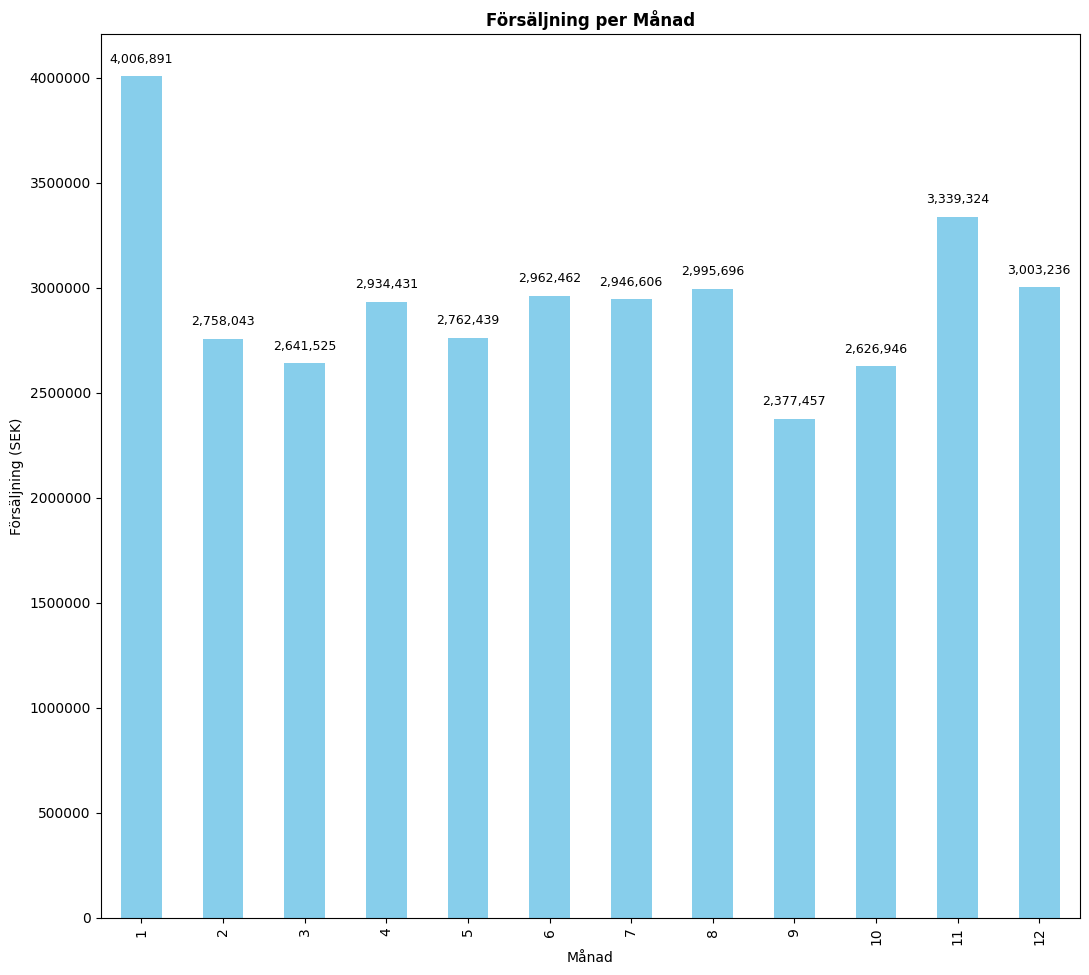

In [84]:
# Skapa figuren med bara 1 diagram
fig, ax1 = plt.subplots(1, 1, figsize=(11, 10))
fig.suptitle('', fontsize=16, fontweight='bold')

# 1. Försäljning per månad
månads_försäljning.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Försäljning per Månad', fontweight='bold')
ax1.set_xlabel('Månad')
ax1.set_ylabel('Försäljning (SEK)')
ax1.ticklabel_format(style='plain', axis='y')

# Lägg till värden ovanpå staplarna
for i, v in enumerate(månads_försäljning):
    ax1.text(i, v + 50000, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

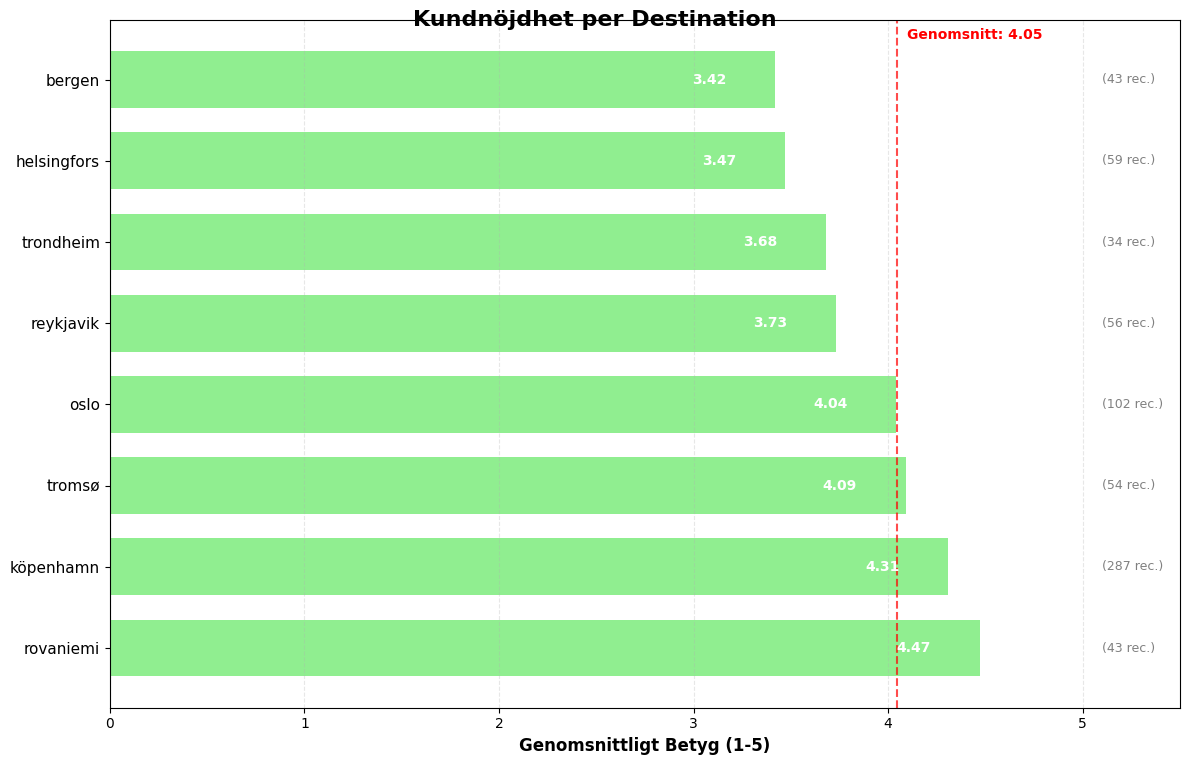

In [85]:
# Skapa ett stort diagram (1x1)
fig, ax3 = plt.subplots(1, 1, figsize=(12, 8))

# Titel för hela figuren
fig.suptitle('Kundnöjdhet per Destination', 
             fontsize=16, fontweight='bold', y=0.95)

# Förbered data
top_dests = rating_by_dest[rating_by_dest['count'] >= 10].sort_values('mean', ascending=False)

# Kontrollera att vi har data
if len(top_dests) > 0:
    # Skapa horisontella staplar
    bars = ax3.barh(range(len(top_dests)), top_dests['mean'], color='lightgreen', height=0.7)
    
    # Lägg till antal recensioner i staplarna
    for i, (mean_val, count_val) in enumerate(zip(top_dests['mean'], top_dests['count'])):
        # Placera betyget innanför stapeln
        ax3.text(mean_val - 0.25, i, f'{mean_val:.2f}', 
                ha='right', va='center', fontweight='bold', color='white', fontsize=10)
        # Placera antalet recensioner till höger
        ax3.text(5.1, i, f'({count_val} rec.)', 
                ha='left', va='center', fontsize=9, color='gray')
    
    # Sätt destinationernas namn på y-axeln
    ax3.set_yticks(range(len(top_dests)))
    ax3.set_yticklabels(top_dests.index, fontsize=11)
    
    # Konfigurera axeln
    ax3.set_xlabel('Genomsnittligt Betyg (1-5)', fontsize=12, fontweight='bold')
    ax3.set_title('', 
                 fontsize=14, fontweight='bold', pad=15)
    ax3.set_xlim(0, 5.5)  # Litet utrymme för antal-recensioner text
    
    # Lägg till en vertikal linje för genomsnittet
    avg_all = df_reviews['betyg'].mean() if 'df_reviews' in locals() else top_dests['mean'].mean()
    ax3.axvline(x=avg_all, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
    ax3.text(avg_all + 0.05, len(top_dests) - 0.5, 
             f'Genomsnitt: {avg_all:.2f}', 
             color='red', fontsize=10, fontweight='bold')
    
    # Lägg till grid för bättre läsbarhet
    ax3.grid(True, axis='x', alpha=0.3, linestyle='--')
    
else:
    # Om ingen data finns
    ax3.text(0.5, 0.5, 'Inga destinationer med minst 10 recensioner', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('Bästa Destinationerna', fontsize=14, fontweight='bold')
    ax3.set_xlabel('')
    ax3.set_ylabel('')

plt.tight_layout()
plt.show()

Anledning: Visualiseringar gör det enklare att förstå data. Jag har valt 3 typer av diagram:
Stapeldiagram för försäljning - visar månatliga trender tydligt
Horisontellt stapeldiagram för betyg - lätt att se rangordning
